# Demo Gaussian Mechanism Confidence Interval #

Exact CI: 14.628781668617956
14.620938800541428


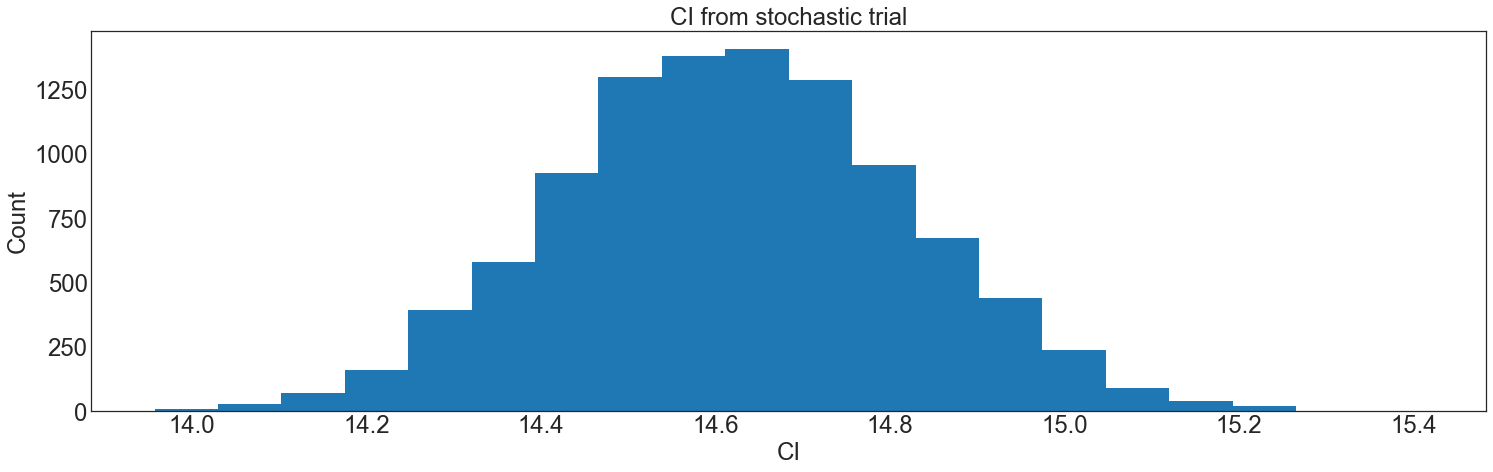

In [10]:
from eeprivacy.mechanisms import (
    GaussianMechanism
)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy import stats

np.random.seed(1234) # Fix seed for deterministic documentation

mpl.style.use("seaborn-white")

MD = 20
LG = 24
plt.rcParams.update({
    "figure.figsize": [25, 7],
    "legend.fontsize": MD,
    "axes.labelsize": LG,
    "axes.titlesize": LG,
    "xtick.labelsize": LG,
    "ytick.labelsize": LG,
})

# Exact
ci = GaussianMechanism.confidence_interval(
  epsilon=1.0, sensitivity=1, confidence=0.95, delta=1e-12
)
print(f"Exact CI: {ci}")

# Stochastic
trials = []

for t in range(10000):

  res = GaussianMechanism.execute_batch(
    values=np.zeros(10000), 
    epsilon=0.1, 
    sensitivity=100/1000,
    delta=1e-12
  )
  trials.append(np.quantile(res, 0.975))

print(np.mean(trials))
  
plt.hist(trials, bins=20)
plt.title("CI from stochastic trial")
plt.xlabel("CI")
plt.ylabel("Count")
plt.show()


In [8]:
# Now the reverse
epsilon = gaussian_mechanism_epsilon_for_confidence_interval(
  target_ci=14.62,
  sensitivity=1,
  confidence=0.95,
  delta=1e-12
)
print(epsilon)

1.0006006613281777


In [3]:
trials = []
for t in range(20):
    A = private_mean_with_laplace(values=[0, 0, 0], epsilon=1.0, lower_bound=0, upper_bound=1)
    trials.append(A)
    
plt.hist(trials, bins=20)
plt.show()


trials = []
values = np.random.laplace(4, scale=1, size=1000)

for t in range(1000):
    A = private_mean_with_laplace(values=values, epsilon=0.1, lower_bound=0, upper_bound=20)
    trials.append(A)
    
print(np.mean(values))

plt.hist(values, bins=20)
plt.show()
plt.hist(trials, bins=20)
plt.show()

print(np.mean(trials))


NameError: name 'private_mean_with_laplace' is not defined